# Installing libraries and downloading data

In [ ]:
! pip install music21
! pip install mido
! pip install pykeops
! git clone -b develop https://github.com/robert-lieck/pitchscapes.git

     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 358kB 14.2MB/s 
  Created wheel for pykeops: filename=pykeops-1.4.2-cp36-none-any.whl size=485953 sha256=a46e36a08c195ff32b9b530de55cb474b6f0883a298d9fb5d022f05d9318b6ed
  Stored in directory: /root/.cache/pip/wheels/9b/ec/76/94d034cbec746ed30b447710eaa0c64ba25cb0a85a7f0f649d
Successfully built pykeops
Cloning into 'pitchscapes'...
remote: Enumerating objects: 333, done.
remote: Total 333 (delta 0), reused 0 (delta 0), pack-reused 333
Receiving objects: 100% (333/333), 3.71 MiB | 2.16 MiB/s, done.
Resolving deltas: 100% (176/176), done.


The data is stored in xml files and it is converted to pitch-class distributions connected to its metadata info with following line. Since, we could not upload the data we uploaded already processed csv-s to dropbox, but we provide the way how we got csv-s. In this setup, the folder that contains all pieces is data/scores. There xml files are in subfolders by composers. Additionally, metadata would be in data/metadata.csv

In [ ]:
# This is how how the data is extracted from original xml files to final csv form with pitch-class distribution
# data_with_metadata = get_data_with_metadata(path_metadata= "data/metadata.csv", data_dir = "data/scores/", prior_counts= 10-5)

Next, we get dataset from dropbox. The former includes data, metadata, major and minor with prior counts 1, while the other contains data, metadata, time windows with prior counts $10^{-5}$.

In [ ]:
! wget -O ALL_DATA_ALL_METADATA.csv https://www.dropbox.com/s/a5gyiz81rro1n1r/ALL_DATA_ALL_METADATA.csv?dl=0
! wget -O pitches_pc10-5_time_windows.csv https://www.dropbox.com/s/h1wf8z381yjolkl/pitches_pc10-5_time_windows.csv?dl=0

--2020-12-16 20:16:43--  https://www.dropbox.com/s/a5gyiz81rro1n1r/ALL_DATA_ALL_METADATA.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/a5gyiz81rro1n1r/ALL_DATA_ALL_METADATA.csv [following]
--2020-12-16 20:16:43--  https://www.dropbox.com/s/raw/a5gyiz81rro1n1r/ALL_DATA_ALL_METADATA.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc28c2d2ea21243f23fc79a076ea.dl.dropboxusercontent.com/cd/0/inline/BFNCaKKzulDxqEs-qqSEVIWfwds9BIxlHqVNhHESDy6i2mvT2IJTz65issklZZX4BbyjNzVZtlqgc8MeyjF4T1KK8n5C_bmHhOjK9K5Cs_u4wglnbfKvZ5V9FoNP_owoK48/file# [following]
--2020-12-16 20:16:43--  https://uc28c2d2ea21243f23fc79a076ea.dl.dropboxusercontent.com/cd/0/inline/BFNCaKKzulDxqEs-qqSEVIWfwds9BIxlHqVNhHESDy6i2mvT2IJTz65issklZZX4

In [ ]:
# getting the code
! unzip music_beyond_major_and_minor_afonin_timofeev_kutlesic-main.zip

Archive:  music_beyond_major_and_minor_afonin_timofeev_kutlesic-main.zip
3fbb41f1a59c97db9dde901d6bb6285c6fdb4f7a
   creating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/.gitignore  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/README.md  
   creating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/DMM.py  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/cluster_correlation_table.py  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/estimate_scape.py  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/get_note_pair_per_cluster.py  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/prepare_data.py  
  inflating: music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src/tr

Setup
-----------

Standard imports:



In [ ]:
import torch
import numpy as np
import pandas as pd
import sys
sys.path.append('pitchscapes')
sys.path.append('music_beyond_major_and_minor_afonin_timofeev_kutlesic-main/src')
from DMM import DirichletMixture
from training import train
from cluster_correlation_table import cluster_correlation_table
from get_note_pair_per_cluster import get_note_pairs_per_cluster
from visualization_helpers import plot_distr_over_circle, plot_by_groups, plot_wave, plot_transposition_with_centers
from estimate_scape import estimate_scape
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Data preprocessing
------------

In [ ]:
data_path = 'ALL_DATA_ALL_METADATA.csv'
data_with_metadata = pd.read_csv(data_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
data_numpy = data_with_metadata[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']].to_numpy()
data = torch.Tensor(data_numpy)
data = data.type(dtype)
data = data.cuda()
data.requires_grad = True

## Learning with transposition

In this section, we show results obtained with the Dirichlet Mixture Model using transposition invariance

### Major/Minor (2 clusters)

To validate our model we first check how it finds two clusters that obviously should split data into major and minor keys

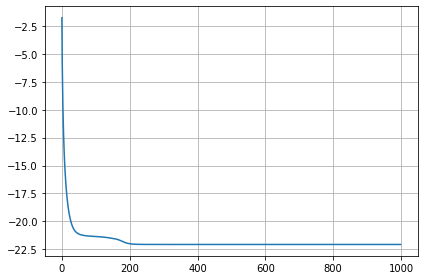

In [ ]:
model = DirichletMixture(2, sparsity=0, D=data.shape[1], transposition=True)
loss = train(model, data, lr=0.05, num_iter=1000)

Let's plot obtained clusters. Trsnposition invariance results in a circle-like form of clusters

In [ ]:
model.plot_clusters(data[::10],  model.predict(data[::10]), dim=2)

<Figure size 576x576 with 0 Axes>

Now, we can plot the distribution of dominant notes by clusters

In [ ]:
pred = model.predict(data)
class_dictionary = get_note_pairs_per_cluster(pred, data)
plot_distr_over_circle(class_dictionary, max_radius=2)

In [ ]:
pred = model.predict(data)
_, text_, _, _ =  estimate_scape(data.detach().cpu().numpy())
table = cluster_correlation_table(pred.detach().cpu().numpy(), text_)
table

,0,1
0,4931,35957
1,36286,8776


This table shows how many points of a given cluster (columns) belong to major or minor kyes (rows). As we see the majority of major points belong to one cluster whereas themajority of minor points belong to the other. It follow from the table that DMM with transposition is able to separate our data according to Major/Minor labels with precision 84%

Next, we repeat the same experiments for bigger number of clusters

### 4 clusters

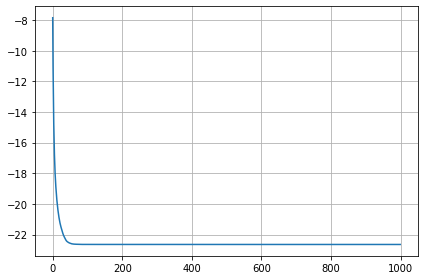

In [ ]:
model = DirichletMixture(4, sparsity=0, D=data.shape[1], transposition=True)
loss = train(model, data, lr=0.1, num_iter=1000)

In [ ]:
model.plot_clusters(data[::10],  model.predict(data[::10]), dim=2)

<Figure size 576x576 with 0 Axes>

In [ ]:
pred = model.predict(data)
class_dictionary = get_note_pairs_per_cluster(pred, data)
plot_distr_over_circle(class_dictionary, max_radius=3)

## Learning without transposition

Here are presented experiments without transposition invariance. They are not meaningful for music. However, it still make sense to look at them for the sake of difference grasp. 

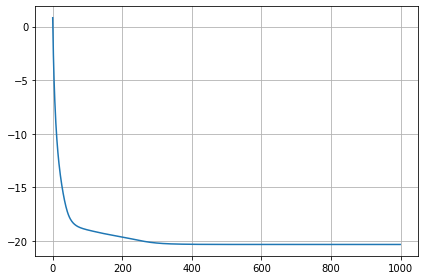

In [ ]:
model = DirichletMixture(3, sparsity=0, D=data.shape[1], transposition=False)
loss = train(model, data, lr=0.02, num_iter=1000)

In [ ]:
model.plot_clusters(data[::10],  model.predict(data[::10]), dim=2)

<Figure size 576x576 with 0 Axes>

In [ ]:
pred = model.predict(data)
class_dictionary = get_note_pairs_per_cluster(pred,data)
plot_distr_over_circle(class_dictionary, max_radius=3)

# Composers

Here is the experiment to check a hypothesis that compositions of one composer form clusters

In [ ]:
test_composers = ['Buxtehude', 'Wolf', 'Binchois', 'Busnoys']
compos_data = []
for composer in test_composers:
    compos_data.append(data_numpy[data_with_metadata['composer'] == composer])
compos_data = torch.Tensor(np.concatenate(compos_data, axis=0))
compos_data = compos_data.type(dtype)
compos_data = compos_data.cuda()
compos_data.requires_grad = True

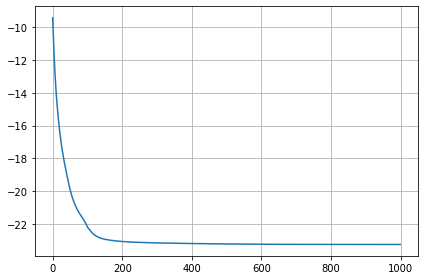

In [ ]:
model = DirichletMixture(4, sparsity=0, D=data.shape[1], transposition=True)
loss = train(model, compos_data, lr=0.02, num_iter=1000)

In [ ]:
pred = model.predict(compos_data)
true_compos_labels = []
for i, composer in enumerate(test_composers):
    true_compos_labels.append(np.ones((data_with_metadata['composer'] == composer).sum()) * i)
true_compos_labels = np.hstack(true_compos_labels)
table = cluster_correlation_table(pred.detach().cpu().numpy(), true_compos_labels)
table

,0,1,2,3
0.0,361,37,352,60
1.0,56,3,511,285
2.0,336,298,123,98
3.0,144,734,4,18


We see that our assumption fails because compositions of all composers are presented in all clusters. This makes sense as composers usually used different styles

# Exploratory analysis

In this section, we present visualizations which are very helpful in exploting the structure of music space

First, we get transpositions and keys of peaces

In [ ]:
scores, major_minor, transposition, full_key = estimate_scape(data_numpy)
# converting full_key in str format to get captions for the plot
for i in range(full_key.shape[0]):
    full_key[i] = full_key[i][:2]
full_key = pd.Series(full_key, dtype='string')

Now, we plot major compositions colorized by their transposition

In [ ]:
plot_by_groups(data_numpy[major_minor==1][::20], full_key[major_minor==1][::20], \
               is_str=True, type_name='tonic', opacity=1.0, name='minor', size=10, dim=3)

The same for minor ones

In [ ]:
plot_by_groups(data_numpy[major_minor==0][::20], full_key[major_minor==0][::20], \
               is_str=True, type_name='tonic', opacity=1.0, name='major', size=10, dim=3)

Next, the plot that is demonstrating the torus-wave structure of the data

In [ ]:
plot_wave(data_numpy[::10], major_minor[::10], name='major_minor', size=10)

Finally, we conduct experiment where we compare the whole corpus and Bach pieces. 

In [ ]:
data_with_metadata  = pd.read_csv('pitches_pc10-5_time_windows.csv')
data = data_with_metadata.iloc[:, 1:13].to_numpy()
scores, major_minor, transposition, full_key = estimate_scape(data)

The pitchscape has its time window that is assigned to the scape in get_data_with_metadata function. For the following visualizations the size of the datapoint (pitchscape) corresponds to time window (the bigger the size, the longer the pitch relative to the whole piece). Next, we plot transposition on the whole corpus (by taking every 29th datapoint). It can be seen that datapoints do not make torus shape. However, scapes with small time windows tend to scatter more.

In [ ]:
text = np.empty([data.shape[0], ], dtype = str)
tw_normalized = 10*data_with_metadata['time_window_normalized'].to_numpy()
plot_transposition_with_centers(data[::29], transposition=transposition[::29], major_minor=major_minor[::29], text=text[::29], assignments=None, maj_min_color=True, landmarks=True, \
                                    landmark_name='albrecht', centers_transposition=False, type_name='colours', \
                                    opacity=0.7, size=tw_normalized[::29], save=True)

ext, we repeat the procedure only on Bach pieces (by taking all pitchscapes). There, it can be seen that datapoints follow the torus structure.

In [ ]:
bach = data_with_metadata.loc[data_with_metadata['composer'] == "Bach"]
data_bach = bach.iloc[:, 1:13].to_numpy()
scores, major_minor, transposition, full_key = estimate_scape(data_bach)
tw_normalized_bach = 10*bach['time_window_normalized'].to_numpy()
text = np.empty([data_bach.shape[0], ], dtype = str)
plot_transposition_with_centers(data_bach, transposition=transposition, major_minor=major_minor, text=text, assignments=None, maj_min_color=True, landmarks=True, \
                                    landmark_name='albrecht', centers_transposition=False, type_name='colours', \
                                    opacity=0.7, size=tw_normalized_bach, save=True)